In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import  PolinomicRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.utils.data import train_test_split

In [13]:
n = 1000
x=np.linspace(2,10,n)
y=x**2 + x+ 5*np.sin(x) + 3*np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,13.053563
1,2.008008,7.180663
2,2.016016,12.182330
3,2.024024,14.940596
4,2.032032,3.223769


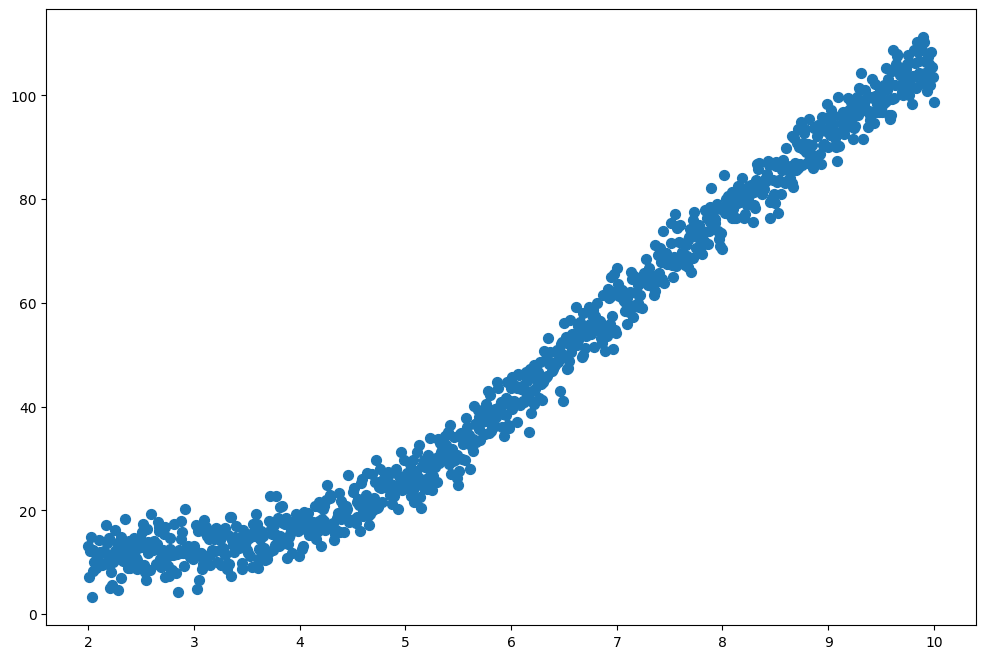

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [15]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [16]:
model=PolinomicRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.0005,
                      n_grade=2)

model.train(X_train, y_train,n_iters=10, history_train=True)

Iter:	1	==================================================>	 mean_squared_error: 211.983% 	 r2_score: 62.41% 

Iter:	2	==================================================>	 mean_squared_error: 128.699% 	 r2_score: 90.82% 

Iter:	3	==================================================>	 mean_squared_error: 86.099% 	 r2_score: 88.13% 

Iter:	4	==================================================>	 mean_squared_error: 56.038% 	 r2_score: 95.42% 

Iter:	5	==================================================>	 mean_squared_error: 42.137% 	 r2_score: 94.92% 

Iter:	6	==================================================>	 mean_squared_error: 31.024% 	 r2_score: 97.24% 

Iter:	7	==================================================>	 mean_squared_error: 26.720% 	 r2_score: 97.01% 

Iter:	8	==================================================>	 mean_squared_error: 22.462% 	 r2_score: 97.90% 

Iter:	9	==================================================>	 mean_squared_error: 21.276% 	 r2_score: 97.72% 

Iter:	10

In [17]:
history = model.history_train
history

{'iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'loss': [np.float64(211.9826026884593),
  np.float64(128.69944714111426),
  np.float64(86.09854241978441),
  np.float64(56.03804694374916),
  np.float64(42.13688667648963),
  np.float64(31.023532181278423),
  np.float64(26.72012357678674),
  np.float64(22.462395264757774),
  np.float64(21.27600547361565),
  np.float64(19.562307937551004)],
 'precision': [np.float64(0.6240971313536907),
  np.float64(0.9081751594010363),
  np.float64(0.881275005995523),
  np.float64(0.9542417863717844),
  np.float64(0.9492132103762686),
  np.float64(0.9724482456905639),
  np.float64(0.9701294972453579),
  np.float64(0.9790037916286415),
  np.float64(0.9772176358994914),
  np.float64(0.9811430679682874)],
 'params': [{'bias': array([0.98996023]),
   'weights': array([0.32235384, 0.80987445])},
  {'bias': array([1.0014109]), 'weights': array([0.39126186, 1.28619246])},
  {'bias': array([0.99262184]), 'weights': array([0.33837091, 0.92059039])},
  {'bias': array([0

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [19]:
model.evaluate(X_test, y_test)

np.float64(0.9775303933738682)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.98%)')

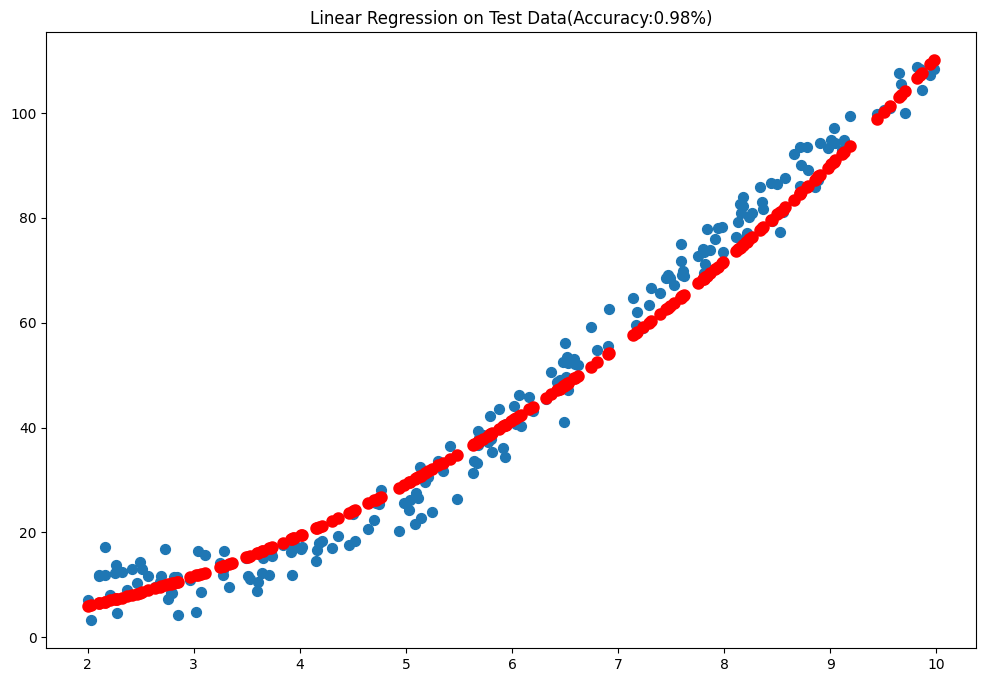

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.scatter(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{model.evaluate(X_test, y_test):.2f}%)')